In [98]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
# %matplotlib notebook

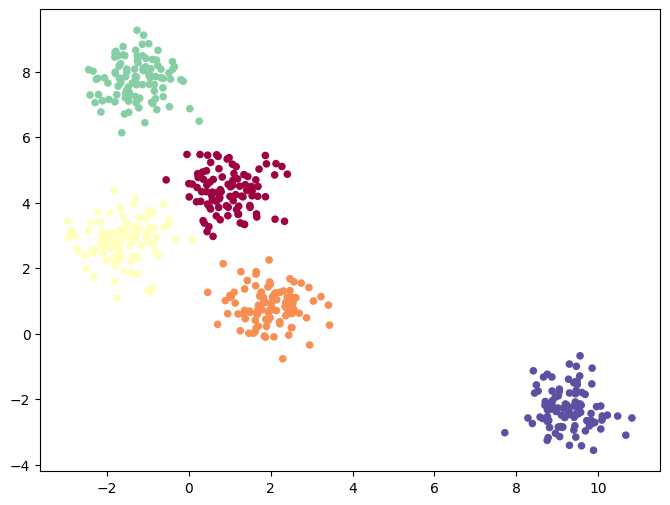

In [99]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20) 

In [100]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 10):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(X)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9]

Text(0.5, 1.0, 'elbow method')

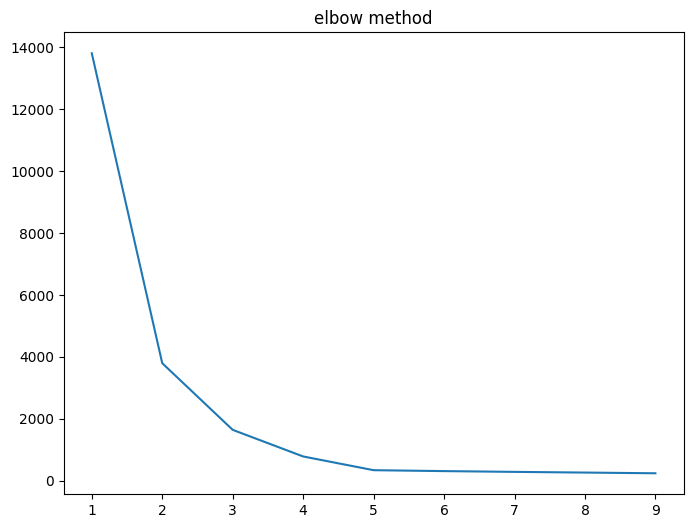

In [101]:
plt.figure(figsize=(8,6))
plt.plot(ks, wcss) 
plt.title ('elbow method')

In [102]:
K = 5

In [103]:
from sklearn.cluster import AgglomerativeClustering

In [104]:
clf = AgglomerativeClustering(n_clusters=K, linkage= 'complete')  
predicted = clf.fit_predict(X)

Text(0.5, 1.0, 'complete linkage')

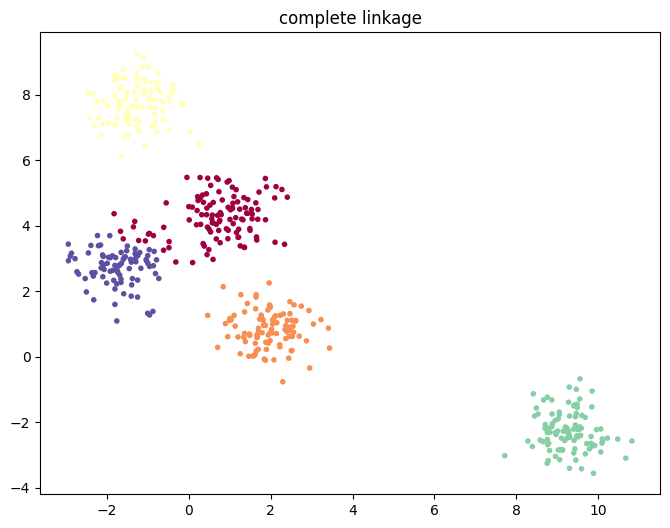

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[predicted], marker= '.') 
plt.title ('complete linkage')

Text(0.5, 1.0, 'single linkage')

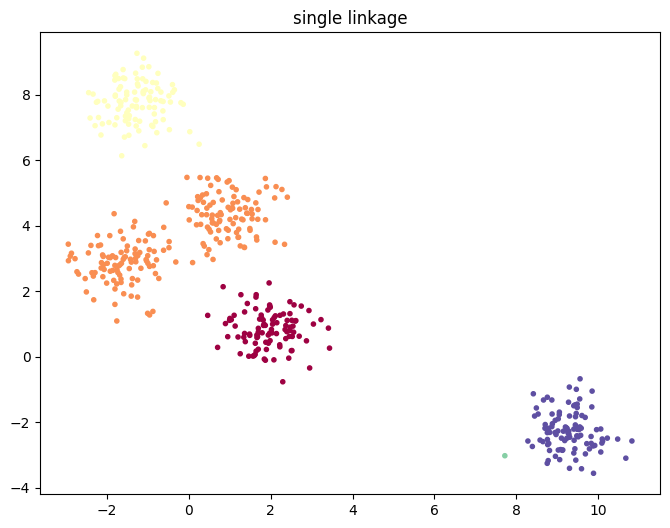

In [106]:
clf = AgglomerativeClustering(n_clusters=K, linkage= 'single')  
predicted = clf.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[predicted], marker= '.') 
plt.title ('single linkage')

In [107]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [108]:
def apply_db_scan(points, eps):
    dbscan = DBSCAN(eps=eps, min_samples=2, ).fit(points) # default eps=0.5, min_samples=5
    # dbscan = DBSCAN(min_samples=6).fit(points)
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted))-1
    print ('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

    predicted[np.where(predicted == -1)] = n_clusters_and_noice
    return predicted 

predicted  =  apply_db_scan(X, eps=0.45) #  1.6 (5) # 1.7(3) # 1.65 (4but...) # 1.5 (8 looks good)
print (predicted)

n_clusters_and_noice =8

[0 1 1 2 1 3 1 3 0 0 4 2 1 4 2 3 2 3 1 2 0 3 5 2 0 4 0 0 4 2 0 1 1 4 1 0 0
 3 3 3 4 3 2 5 1 1 3 1 0 4 1 3 0 8 3 1 3 3 4 2 8 3 0 2 1 4 2 4 1 1 1 0 2 3
 1 2 0 0 2 0 2 4 1 1 3 0 3 1 1 2 2 4 4 2 3 0 0 2 4 1 8 8 4 0 6 2 3 0 0 1 1
 2 0 3 3 4 4 4 0 3 3 8 1 4 2 1 3 2 4 4 6 0 1 3 4 3 3 3 1 2 0 4 0 2 0 3 8 4
 8 1 1 4 4 0 2 1 1 1 4 2 4 3 2 1 0 0 2 0 3 0 2 1 3 3 0 4 2 4 1 4 1 4 4 8 2
 3 0 1 4 3 4 0 3 2 0 2 1 3 4 4 0 4 1 4 4 0 3 2 2 1 3 4 1 4 3 4 3 0 0 1 0 2
 3 3 3 1 2 3 3 2 0 2 1 4 4 2 4 2 3 1 0 1 4 3 0 0 4 4 0 3 3 1 0 0 1 1 8 1 2
 4 3 2 4 0 1 2 3 0 2 1 1 4 2 0 4 0 4 0 4 4 2 0 0 0 1 0 4 2 4 3 2 1 1 1 0 3
 4 2 3 4 3 7 0 0 4 1 3 0 0 4 3 4 1 3 1 2 1 3 3 3 4 4 1 0 1 4 3 3 0 0 4 2 0
 1 1 2 2 4 8 3 2 1 2 3 0 0 0 4 1 5 2 0 2 1 0 0 2 1 1 3 2 1 3 1 2 0 2 0 4 4
 0 2 3 1 0 0 3 1 4 1 3 3 8 3 3 4 4 3 2 4 4 4 2 3 3 3 3 0 4 0 1 2 3 0 0 1 2
 1 2 4 3 1 3 4 1 2 3 4 1 0 3 2 4 1 0 7 2 4 0 1 2 3 4 0 4 0 1 4 0 4 0 3 1 1
 4 8 0 1 1 2 1 2 3 2 2 0 3 2 4 2 3 4 1 3 2 2 4 2 2 1 3 2 4 0 1 2 4 3 1 3 2


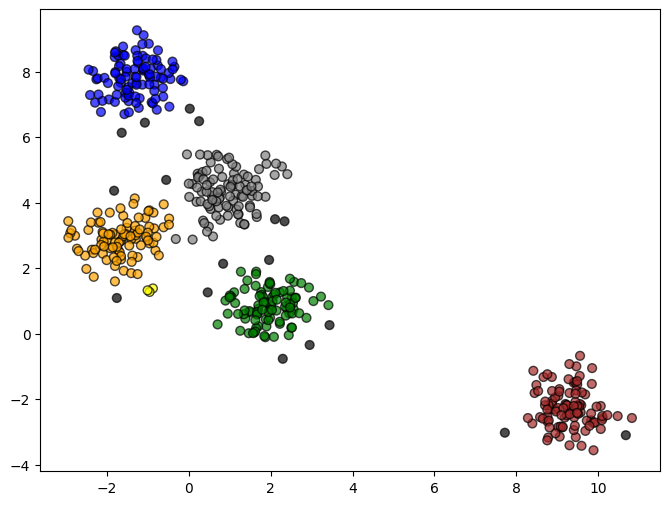

In [109]:
plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
colors= np.r_[colors, np.array(['black']*100)]

plt.scatter(X[:,0], X[:,1], c= colors[predicted], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)  